In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
df=pd.read_csv('perch_full.csv')
X=df.to_numpy()
Y = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
t_x,tt_x,t_y,tt_y= train_test_split(X,Y,random_state=42)
t_x.shape

(42, 3)

In [2]:
#피처확장
from sklearn.preprocessing import PolynomialFeatures # preprocessing전처리  PolynomialFeatures다항식피처
p_m=PolynomialFeatures()
#ex)
p_m.fit([[1,2,3]])
p_m.transform([[1,2,3]])

array([[1., 1., 2., 3., 1., 2., 3., 4., 6., 9.]])

In [3]:
p_m.get_feature_names()

['1', 'x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [4]:
p_m=PolynomialFeatures(include_bias=False)#전처리기 #include_bias=False 절편값 제거(미포함시킴)
p_m.fit(t_x)
p_t_x=p_m.transform(t_x)
p_tt_x=p_m.transform(tt_x)
p_t_x.shape

(42, 9)

In [5]:
p_m.get_feature_names()

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [6]:
from sklearn.linear_model import LinearRegression
m_lr=LinearRegression()
m_lr.fit(p_t_x,t_y)
lr=LinearRegression().fit(t_x,t_y)
print(lr.score(tt_x,tt_y),lr.score(t_x,t_y)) #피처확장전 트레이닝과 테스트의 갭차이가 있는편

0.8796419177546366 0.9559326821885706


In [7]:
print(m_lr.score(p_tt_x,tt_y),m_lr.score(p_t_x,t_y)) #피처 확장후 갭차이

0.9714559911594155 0.9903183436982125


In [8]:
p_m1=PolynomialFeatures(degree=5,include_bias=False).fit(t_x) #degree 최고차항설정
d_t_x=p_m1.transform(t_x)
d_tt_x=p_m1.transform(tt_x)

In [9]:
d_t_x.shape

(42, 55)

In [10]:
p_m1.get_feature_names()

['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [11]:
m_lr1=LinearRegression().fit(d_t_x,t_y)
print(m_lr1.score(d_tt_x,tt_y),m_lr1.score(d_t_x,t_y)) #오버피팅 과대적합 너무많은 피쳐를 가지면서 갭차이가 커짐

-144.40744532797535 0.9999999999938143


In [12]:
#위 문제점 보안
from sklearn.preprocessing import StandardScaler # StandardScaler 규제클래스, 겹치는 부분을 걸러준다
ss=StandardScaler().fit(d_t_x) #d_t_x 과도하게 바꾼 데이터
sc_t_x=ss.transform(d_t_x)
sc_tt_x=ss.transform(d_tt_x)
sc_t_x.shape #shape상 변화는 없다

(42, 55)

In [13]:
# Ridge 릿지회귀
from sklearn.linear_model import Ridge
rg=Ridge().fit(sc_t_x,t_y)
print(rg.score(sc_t_x,t_y),rg.score(sc_tt_x,tt_y)) #StandardScaler와 Ridge를 통해 갭차이 줄임

0.9896101671037343 0.9790693977615386


In [14]:
# 최적의 학습률 찾기
import matplotlib.pyplot as plt
t_l=[]
tt_l=[]
ap_l=[0.001,0.01,0.1,1,10,100] #학습률
for i in ap_l:
    f_rg=Ridge(alpha=i).fit(sc_t_x,t_y) #alpha : 학습률
    t_l.append(f_rg.score(sc_t_x,t_y))
    tt_l.append(f_rg.score(sc_tt_x,tt_y))

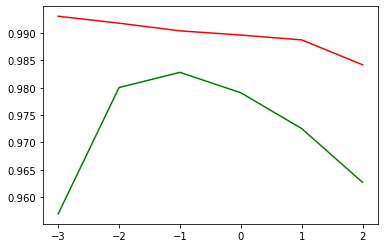

In [15]:
plt.plot(np.log10(ap_l),t_l,'r') #R^2
plt.plot(np.log10(ap_l),tt_l,'g')
#-1, 즉 학습률(alpha)이 0.1일때 갭차이가 제일 적다

In [16]:
# 학습률이 0.1일 때 최적의 값이 나온다
rlr=Ridge(alpha=0.1).fit(sc_t_x,t_y)
print(rlr.score(sc_t_x,t_y),rlr.score(sc_tt_x,tt_y))

0.9903815817570368 0.9827976465386896


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.075969939724, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097475362, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926335934, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


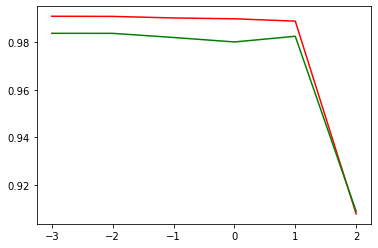

In [17]:
# Lasso 라쏘 회귀
# 최적의 학습률 찾기
from sklearn.linear_model import Lasso
t_l=[]
tt_l=[]
ap_l=[0.001,0.01,0.1,1,10,100]
for i in ap_l:
    f_rg=Lasso(alpha=i,max_iter=1000).fit(sc_t_x,t_y) #Lasso는 Ridge와 달리 max_iter를 입력해줘야함
    t_l.append(f_rg.score(sc_t_x,t_y))
    tt_l.append(f_rg.score(sc_tt_x,tt_y))
plt.plot(np.log10(ap_l),t_l,'r')
plt.plot(np.log10(ap_l),tt_l,'g')

In [18]:
lasso =Lasso(alpha=10)
lasso.fit(sc_t_x,t_y)
print(lasso.score(sc_t_x,t_y),lasso.score(sc_tt_x,tt_y))

0.9888067471131867 0.9824470598706695
